# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [2]:
df = pd.read_csv('../data/wines.csv')

In [3]:
df.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280-OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [4]:
y = df['Class']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
y_cat.head()

1  2  3
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0

In [8]:
X = df.drop('Class', axis=1)

In [9]:
X.shape

(178, 13)

In [10]:
import seaborn as sns

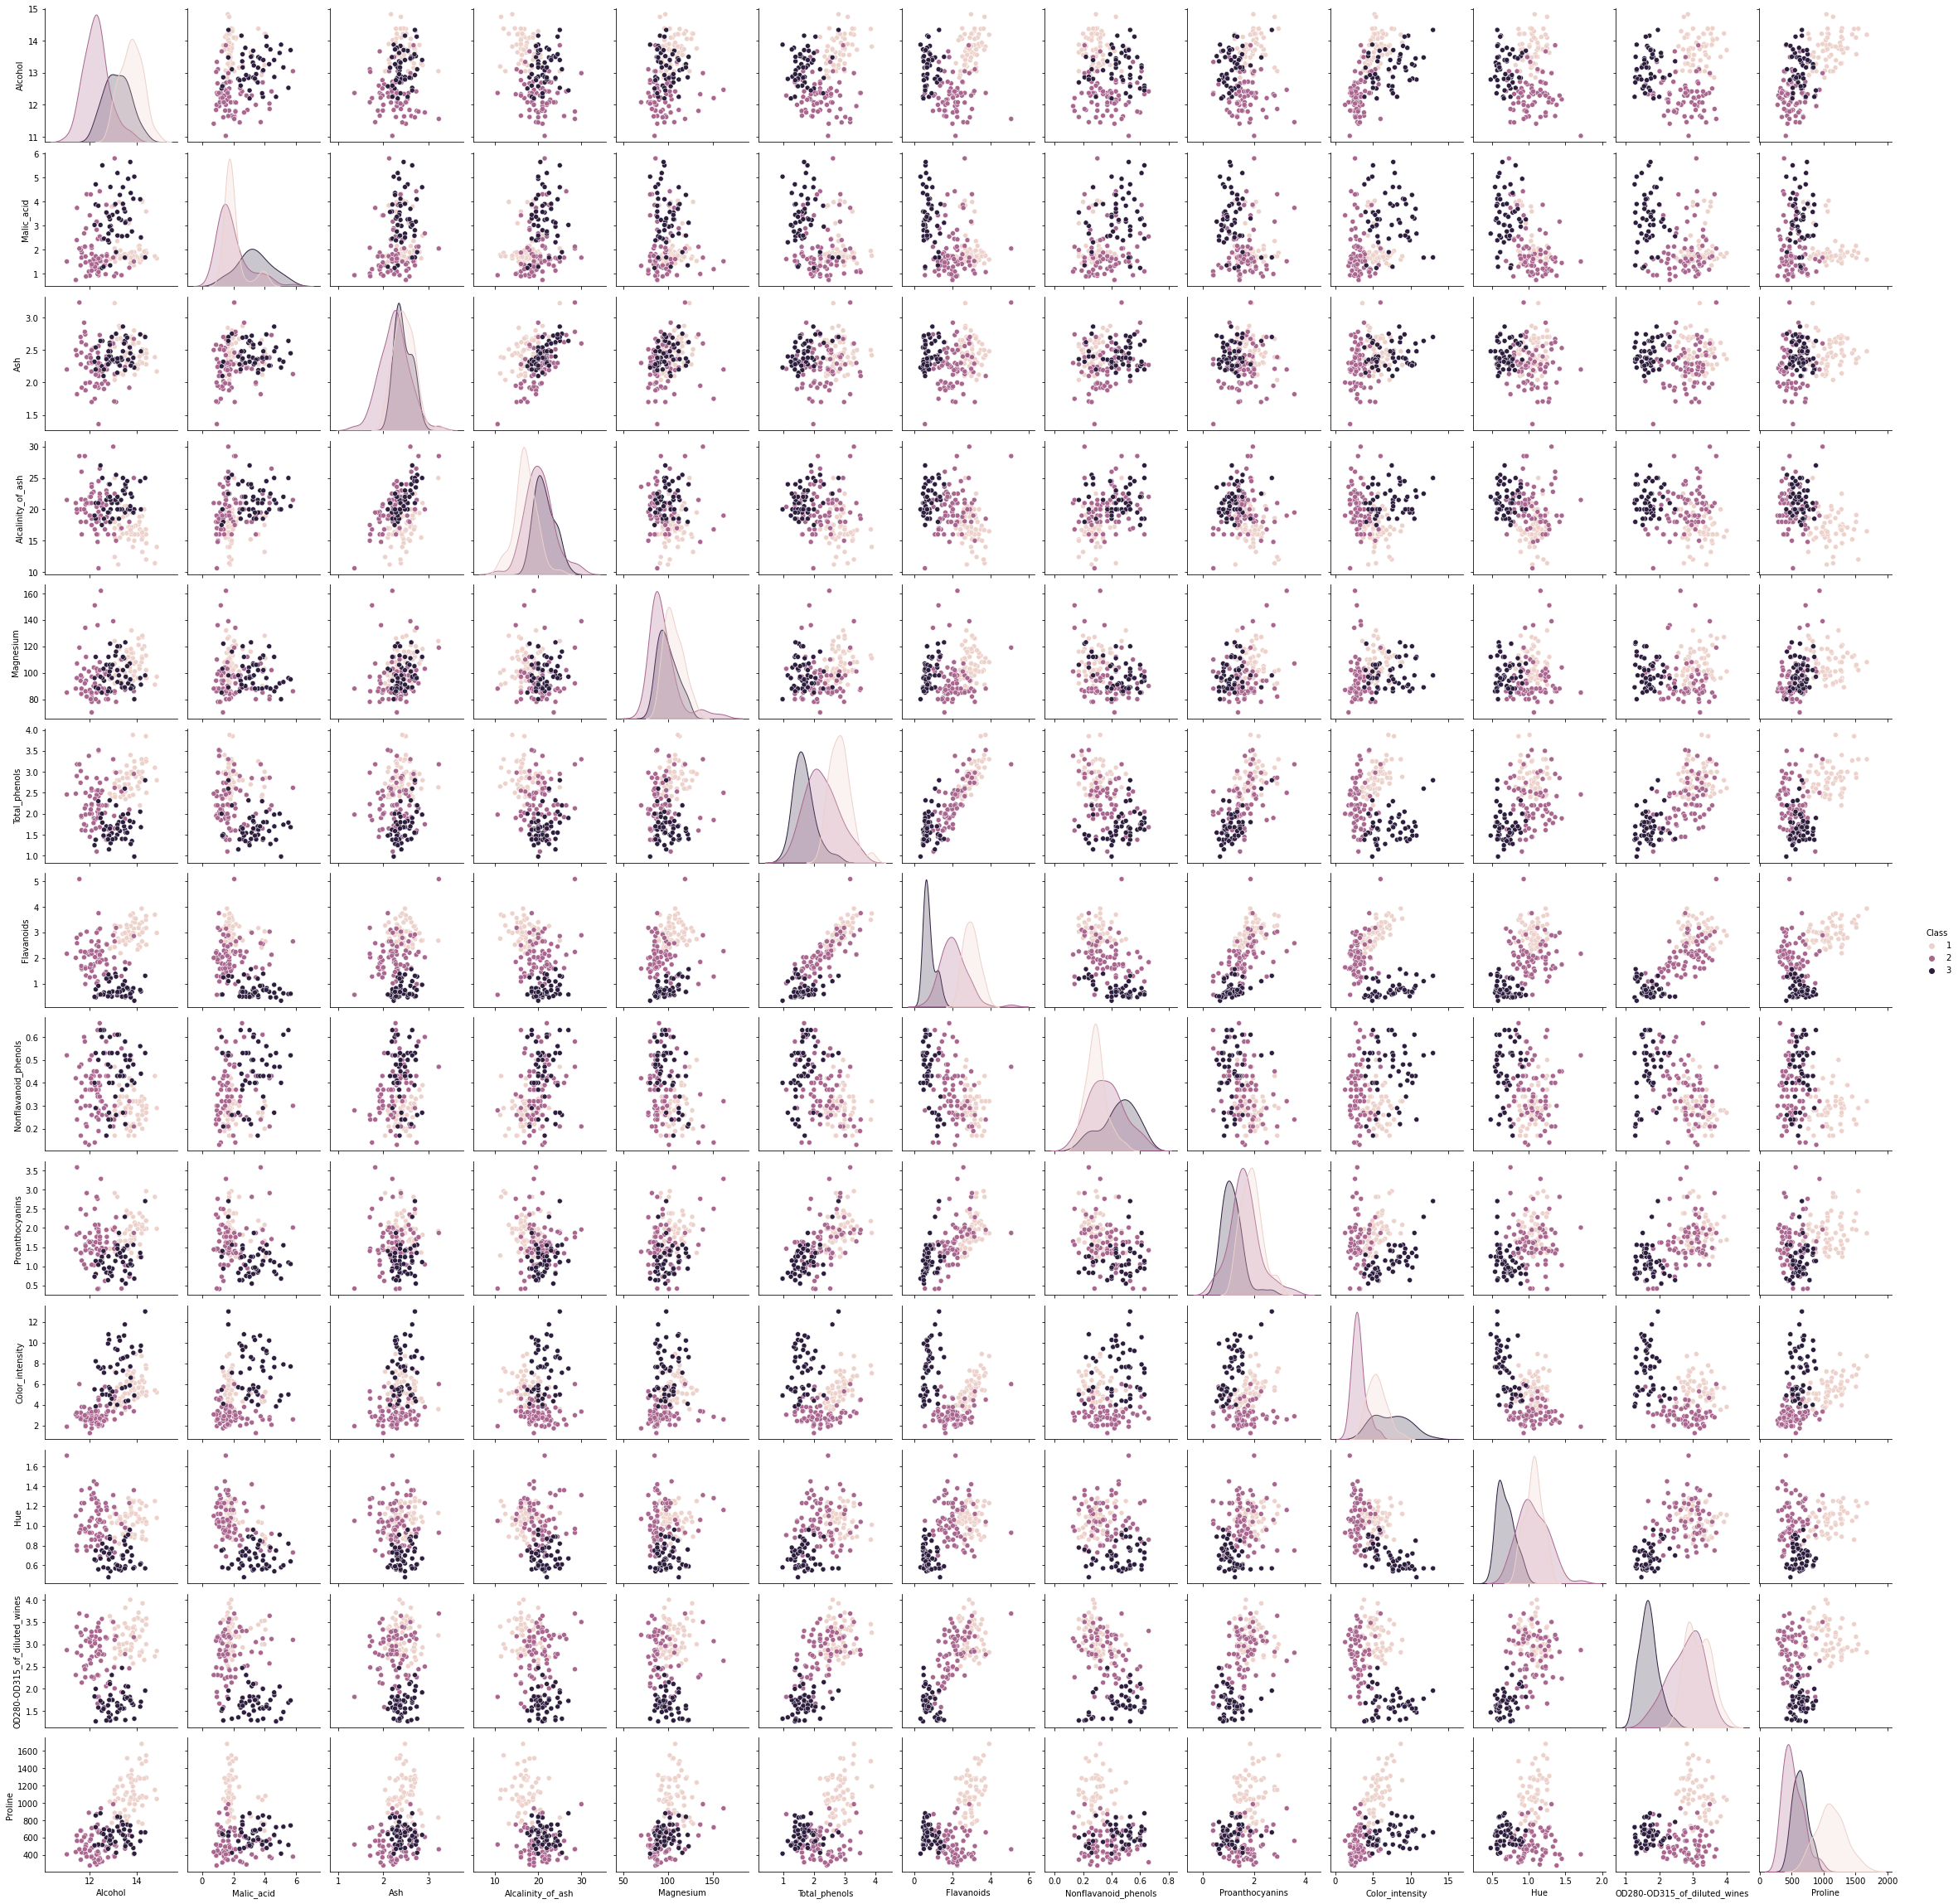

In [11]:
sns.pairplot(df, hue='Class')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
Xsc = sc.fit_transform(X)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import tensorflow.keras.backend as K

In [16]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(learning_rate=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 2s 31ms/step - loss: 0.4619 - accuracy: 0.7817 - val_loss: 0.1636 - val_accuracy: 0.9722
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 1.2558 - val_accuracy: 0.6389
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0940 - accuracy: 0.9789 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 6.7884e-04 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 0.9789 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9789 - val_loss: 1.5800e-04 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 0.9930 - val_loss: 4.6160e-04 - val_accuracy: 1.0000
Epoch 8

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [17]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
                kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(learning_rate=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 4ms/step - loss: 0.4306 - accuracy: 0.8876
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9719
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9831
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0837 - accuracy: 0.9775
Epoch 5/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9831
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9944
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [19]:
inp = model.layers[0].input
out = model.layers[2].output

In [20]:
features_function = K.function([inp], [out])

In [21]:
features = features_function([Xsc])[0]

In [22]:
features.shape

(178, 2)

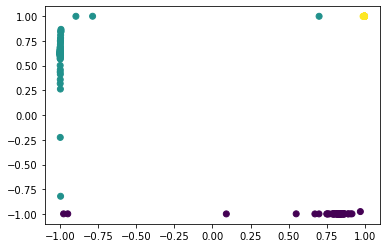

In [23]:
plt.scatter(features[:, 0], features[:, 1], c=y)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [24]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [25]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(learning_rate=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
12/12 [==============================] - 2s 3ms/step - loss: 0.5303 - accuracy: 0.8146
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9775
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1609 - accuracy: 0.9494
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0690 - accuracy: 0.9888
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0

In [26]:
features_function = K.function([inputs], [second_to_last])

In [27]:
features = features_function([Xsc])[0]

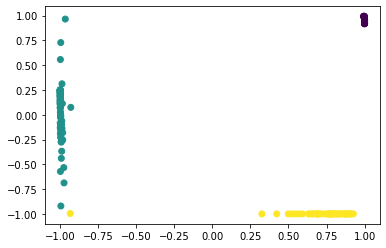

In [28]:
plt.scatter(features[:, 0], features[:, 1], c=y)

## Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [30]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [31]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

In [32]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [35]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(learning_rate=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 1/20
4/4 - 2s - loss: 0.7828 - accuracy: 0.6371 - val_loss: 0.6755 - val_accuracy: 0.6481

Epoch 00001: val_loss improved from inf to 0.67555, saving model to /tmp/udemy\weights.hdf5
Epoch 2/20
4/4 - 0s - loss: 0.6200 - accuracy: 0.7419 - val_loss: 0.5098 - val_accuracy: 0.9444

Epoch 00002: val_loss improved from 0.67555 to 0.50977, saving model to /tmp/udemy\weights.hdf5
Epoch 3/20
4/4 - 0s - loss: 0.4402 - accuracy: 0.9516 - val_loss: 0.3001 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.50977 to 0.30007, saving model to /tmp/udemy\weights.hdf5
Epoch 4/20
4/4 - 0s - loss: 0.2703 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9259

Epoch 00004: val_loss did not improve from 0.30007
Epoch 00004: early stopping


Run Tensorboard with the command:

    tensorboard --logdir /tmp/udemy/tensorboard/
    
and open your browser at http://localhost:6006